In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import logging
logging.basicConfig(level=os.environ.get("LOGLEVEL", "INFO"))

# loading packages
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
sns.set()
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [2]:
store_df = pd.read_csv('store.csv', low_memory = False)

In [3]:
train_df = pd.read_csv('train.csv', parse_dates = True, low_memory = False)

In [4]:
test_df = pd.read_csv('test.csv', parse_dates = True, low_memory = False)

### Data cleaning tasks :
* understanding data information
* Handling missing value
* data exploration and extraction 
* checking distribution of variables
* filling null values
* correlational Analysis 

#### Data information

In [5]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [7]:
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB


In [8]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [9]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [10]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


#### Data Exploration and Extraction
Spliting a date column into separate day,month,year column in pandas.

In [12]:
# time series as indexes
train_df.index

RangeIndex(start=0, stop=1017209, step=1)

In [13]:
# prepare: input should be float type
# data extraction
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Day'] = train_df['Date'].dt.day
train_df['WeekOfYear'] = train_df['Date'].dt.weekofyear
len(train_df['Date'].dt.week)
train_df['Date'].dt.week

# adding new variable
train_df['SalePerCustomer'] = train_df['Sales']/train_df['Customers']
train_df['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

### ECDF: empirical cumulative distribution function

This cumulative distribution function is a step function that jumps up by 1/n at each of the n data points. Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value. The empirical distribution function is an estimate of the cumulative distribution function that generated the points in the sample. It converges with probability 1 to that underlying distribution, according to the Glivenko–Cantelli theorem. To get the first impression about continious variables in the data we can plot ECDF.

Distibution of two emprical variables:Sales and Customers are checked

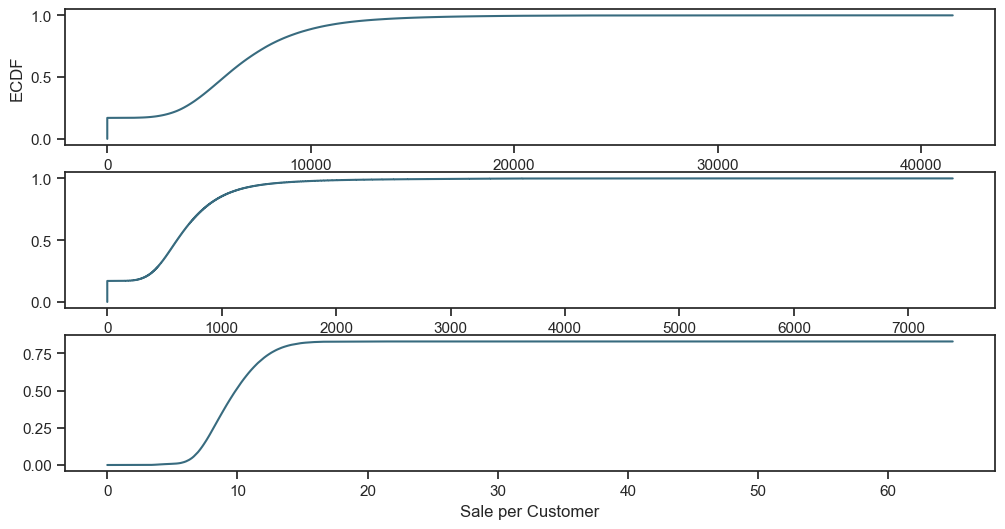

In [14]:
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(train_df['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales'); plt.ylabel('ECDF');

# plot second ECDF  
plt.subplot(312)
cdf = ECDF(train_df['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Customers');

# plot second ECDF  
plt.subplot(313)
cdf = ECDF(train_df['SalePerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sale per Customer');

About 20% of data has zero amount of sales / customers that we need to deal with and almost 80% of time daily amount of sales was less than 1000.

#### Handling null values

In [15]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [16]:
# Filling null with median
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [17]:
store_df.fillna(0, inplace = True)
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [18]:
train_df.isnull().sum()

Store                   0
DayOfWeek               0
Date                    0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
Year                    0
Month                   0
Day                     0
WeekOfYear              0
SalePerCustomer    172869
dtype: int64

In [19]:
# Filling null with median
train_df['SalePerCustomer'].fillna(train_df['SalePerCustomer'].median(), inplace = True)

In [20]:
train_df.fillna(0, inplace = True)
train_df.isnull().sum()

Store              0
DayOfWeek          0
Date               0
Sales              0
Customers          0
Open               0
Promo              0
StateHoliday       0
SchoolHoliday      0
Year               0
Month              0
Day                0
WeekOfYear         0
SalePerCustomer    0
dtype: int64

In [21]:
test_df.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [22]:
# Filling null with median
train_df['Open'].fillna(train_df['Open'].median(), inplace = True)

In [23]:
test_df.fillna(0, inplace = True)
test_df.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

#### Joining train set with an additional store information.

In [24]:
# by specifying inner join we make sure that only those observations, that are present in both train and store sets are merged together
print("In total: ", train_df.shape)
train_store = pd.merge(train_df, store_df, how='inner', on='Store')
train_store['StateHoliday'] = train_store['StateHoliday'].apply(lambda x: str(x))
train_store

In total:  (1017209, 14)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,2013,...,14.073746,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,2013,...,13.926380,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,2013,...,14.323333,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,2013,...,12.121311,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


#### Checking the distribution of sales among Store types
checking for different levels of StoreType and how the main metric Sales is distributed among them.

In [25]:
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,551627.0,5738.179710,3964.028134,0.0,3508.0,5618.0,7860.00,41551.0
b,15830.0,10058.837334,5280.525506,0.0,6227.0,9025.5,13082.75,38722.0
c,136840.0,5723.629246,3721.700886,0.0,3789.0,5766.0,7849.00,31448.0
d,312912.0,5641.819243,3473.393781,0.0,3986.0,5826.0,7691.00,38037.0


StoreType B has the highest average of Sales among all others. 

however we have much less data for it, So let's check an overall sum of Sales and Customers to see which StoreType is the most selling and crowded one.

In [26]:
train_store.groupby('StoreType')['Customers', 'Sales'].sum()

,Customers,Sales
StoreType,,
a,363541434,3165334859
b,31465621,159231395
c,92129705,783221426
d,156904995,1765392943


 StoreType A comes first and StoreType D goes on the second place in both Sales and Customers.

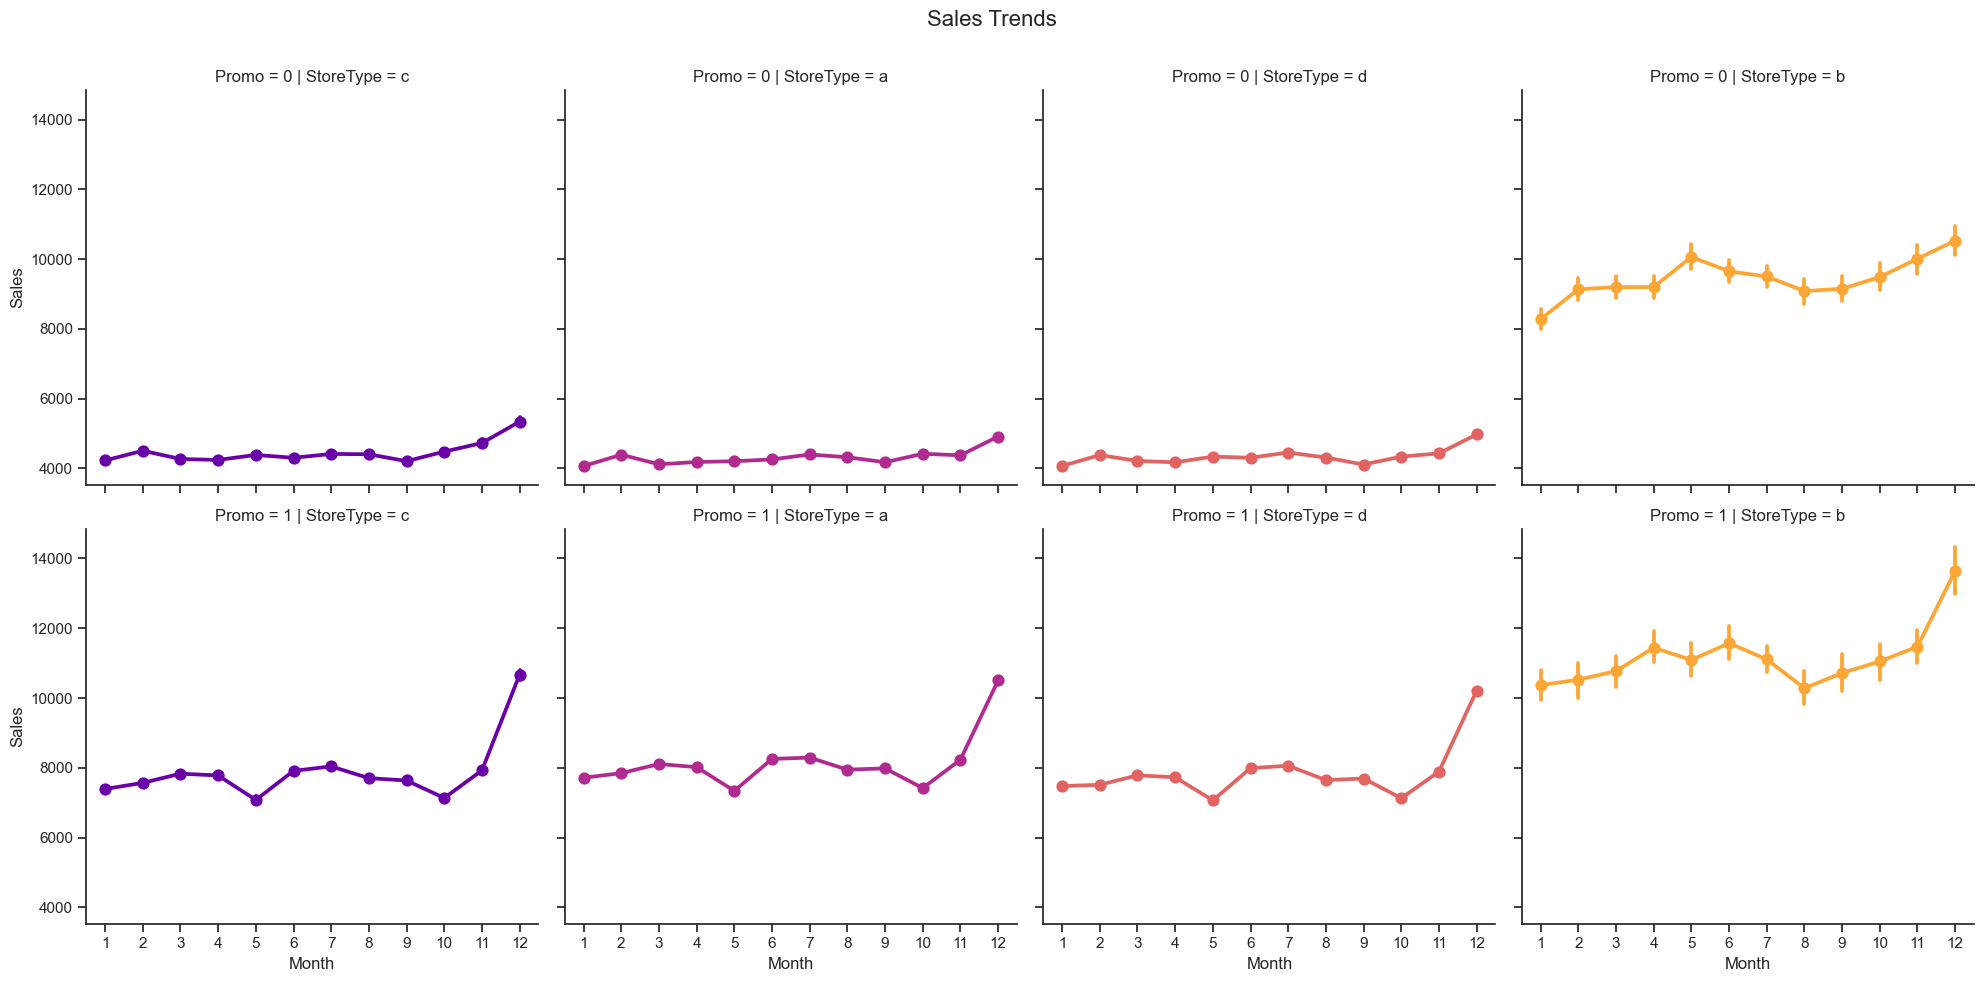

In [27]:
# Create the catplot to visualize sales trends
import seaborn as sns
import matplotlib.pyplot as plt

color = "red"
sns.catplot(data=train_store, x='Month', y='Sales',
            col='StoreType', 
            palette='plasma', hue='StoreType',
            row='Promo', 
            color=color, kind='point')

plt.subplots_adjust(top=0.9)
plt.suptitle('Sales Trends', fontsize=16) 

plt.show()

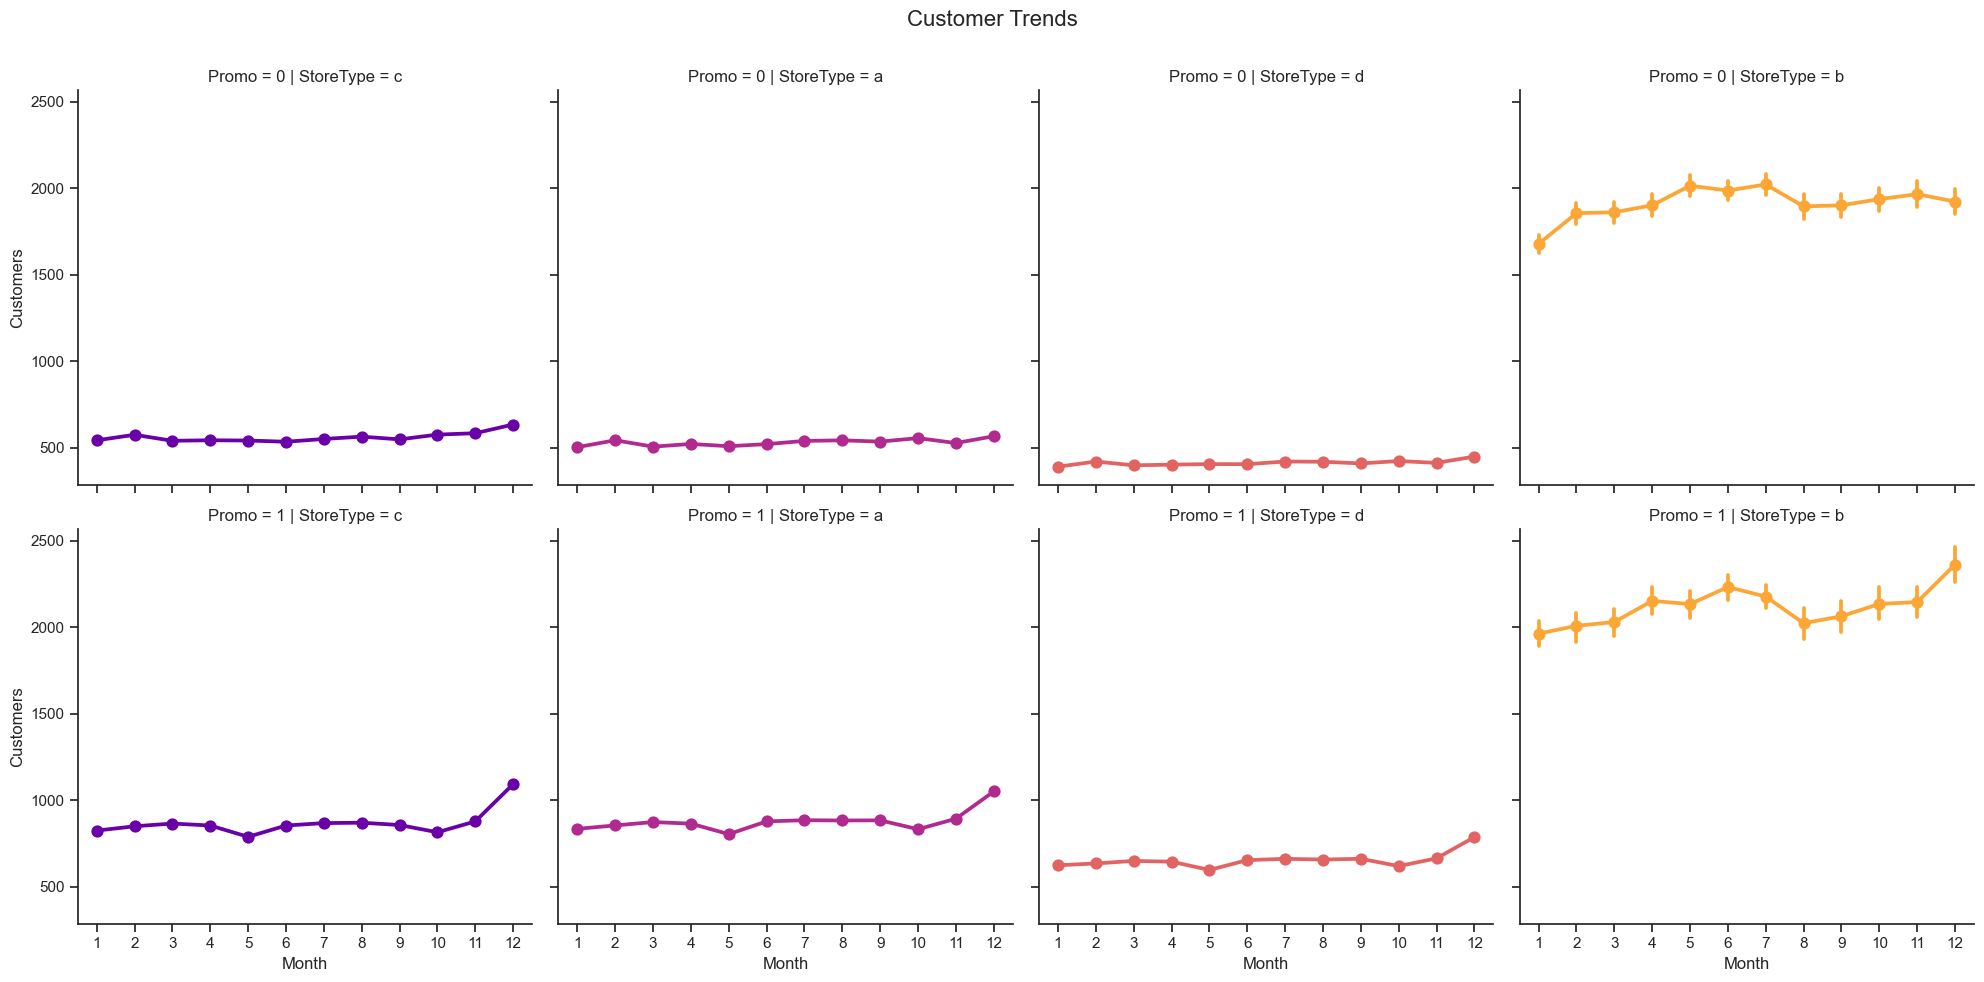

In [28]:
# Create the catplot to visualize customer trends
c = "blue"
sns.catplot(data=train_store, x='Month', y='Customers',
            col='StoreType',
            palette='plasma', hue='StoreType',
            row='Promo',
            kind='point', color=c)

plt.subplots_adjust(top=0.9) 
plt.suptitle('Customer Trends', fontsize=16)
plt.show()

All store types follow the same trend but at different scales depending on the presence of the (first) promotion Promo and StoreType itself (case for B).

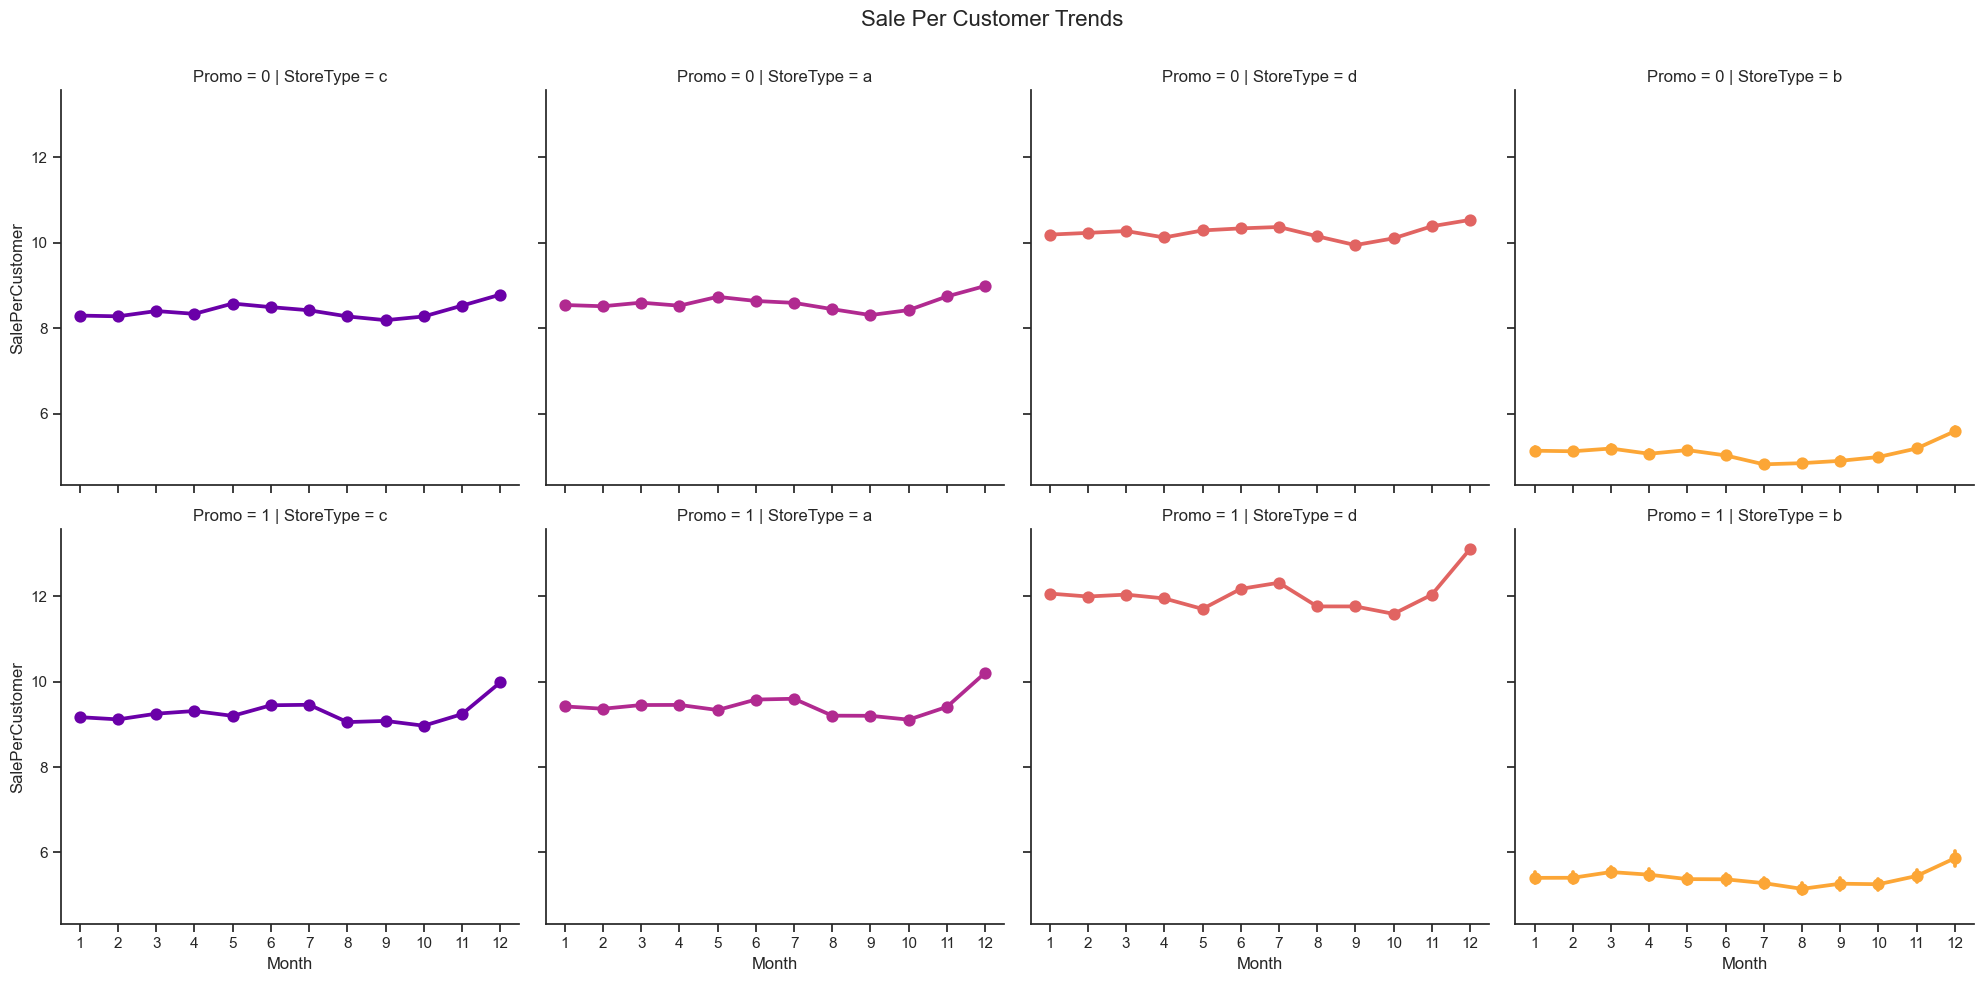

In [31]:
# Create the catplot to visualize "SalePerCustomer" trends

c = "green"
sns.catplot(data=train_store, x='Month', y='SalePerCustomer',
            col='StoreType',  # per store type in cols
            palette='plasma', hue='StoreType',
            row='Promo',  # per promo in the store in rows
            kind='point', color=c)

plt.subplots_adjust(top=0.9)  
plt.suptitle('Sale Per Customer Trends', fontsize=16)
plt.show()

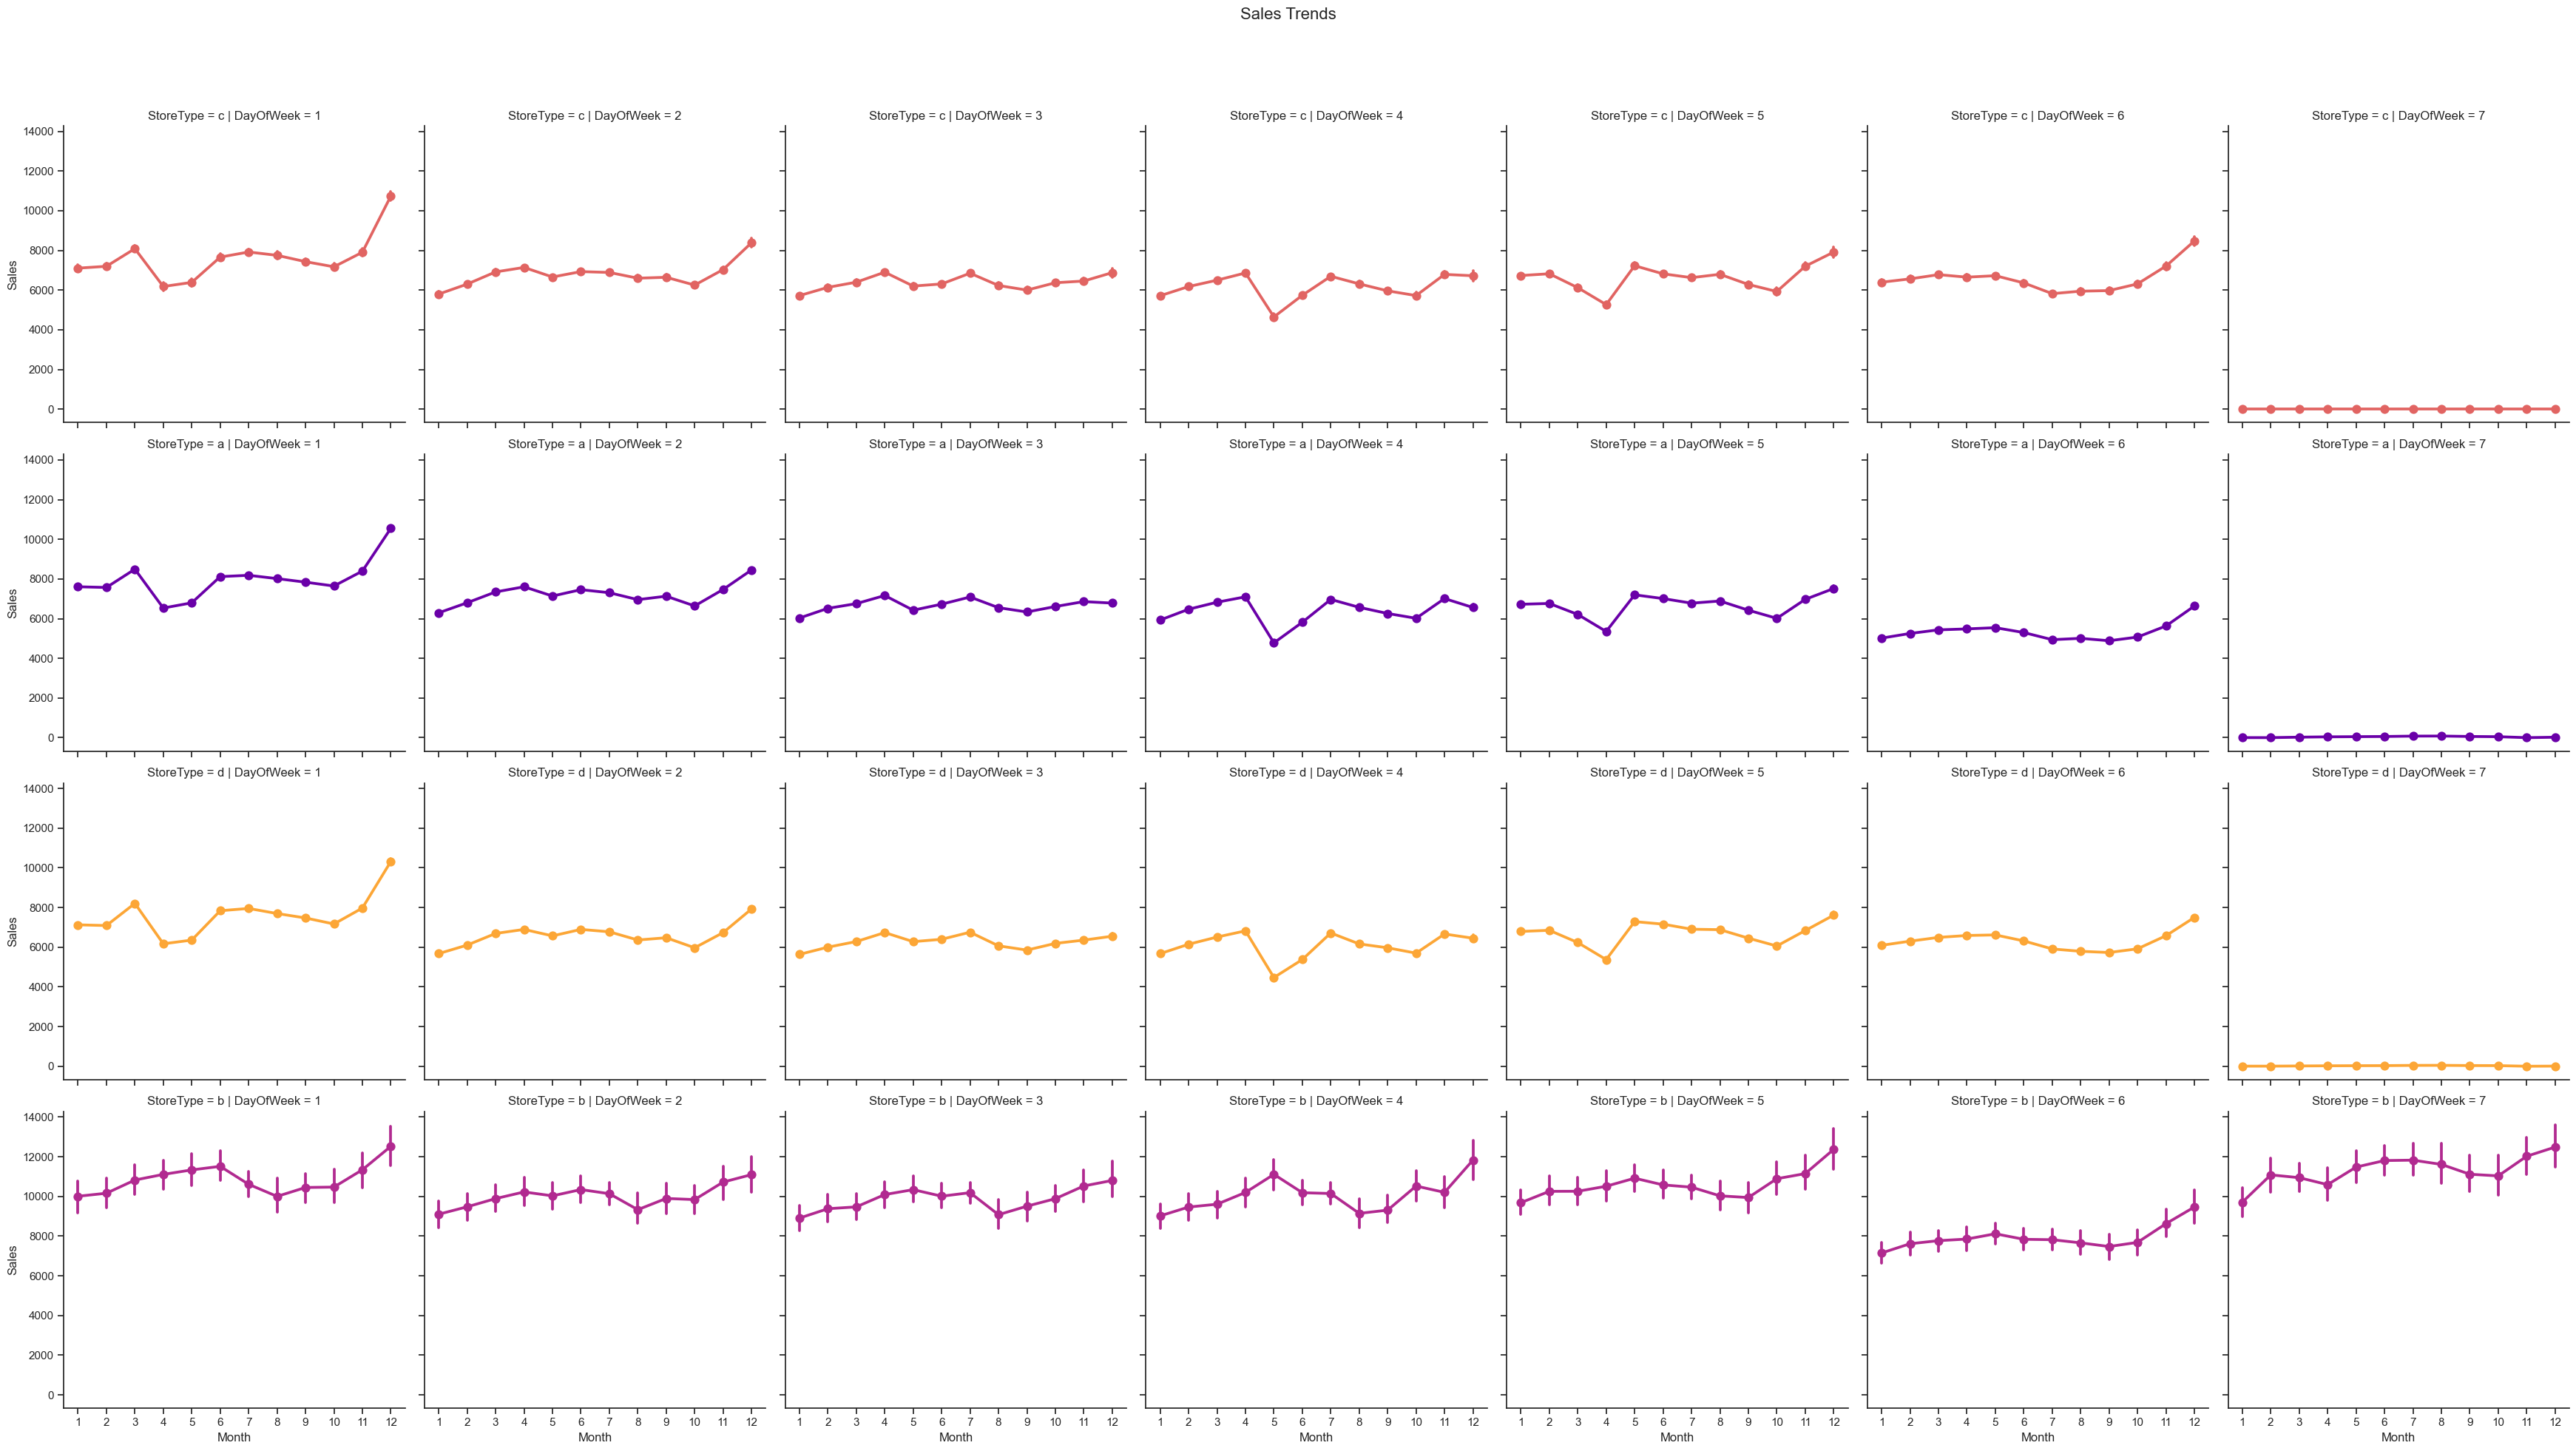

In [32]:
# customers
c = "blue"
sns.catplot(data=train_store, x='Month', y='Sales',
            col='DayOfWeek',  # per DayOfWeek in cols
            palette='plasma', hue='StoreType', hue_order=['a', 'b', 'c', 'd'],
            row='StoreType',  # per store type in rows
            kind='point', color=c) 

plt.subplots_adjust(top=0.9)
plt.suptitle('Sales Trends', fontsize=16)
plt.show()

We see that stores of StoreType C are all closed on Sundays, whereas others are most of the time opened. Interestingly enough, stores of StoreType D are closed on Sundays only from October to December.

In [33]:
# stores which are opened on Sundays
train_store[(train_store.Open == 1) & (train_store.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  877,  931,  948, 1045, 1081, 1097, 1099],
      dtype=int64)

To complete our preliminary data analysis, we can add variables describing the period of time during which competition and promotion were opened:

In [34]:
# competition open time (in months)
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)
    
# Promo open time
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

In [35]:
# replace NA's by 0
train_store.fillna(0, inplace = True)

# average PromoOpen time and CompetitionOpen time per store type
train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,5738.179710,659.034880,12882.592255,7122.919204
b,10058.837334,1987.720846,17264.621605,11264.823310
c,5723.629246,673.265894,12128.625157,6737.717159
d,5641.819243,501.434892,10397.346995,9038.541369


The most selling and crowded StoreType A doesn't appear to be the one the most exposed to competitors. Instead it's a StoreType B, which also has the longest running period of promotion.

### Correlational Analysis
Adding new variables to the data is done, so now we can check the overall correlations by plotting the seaborn heatmap:

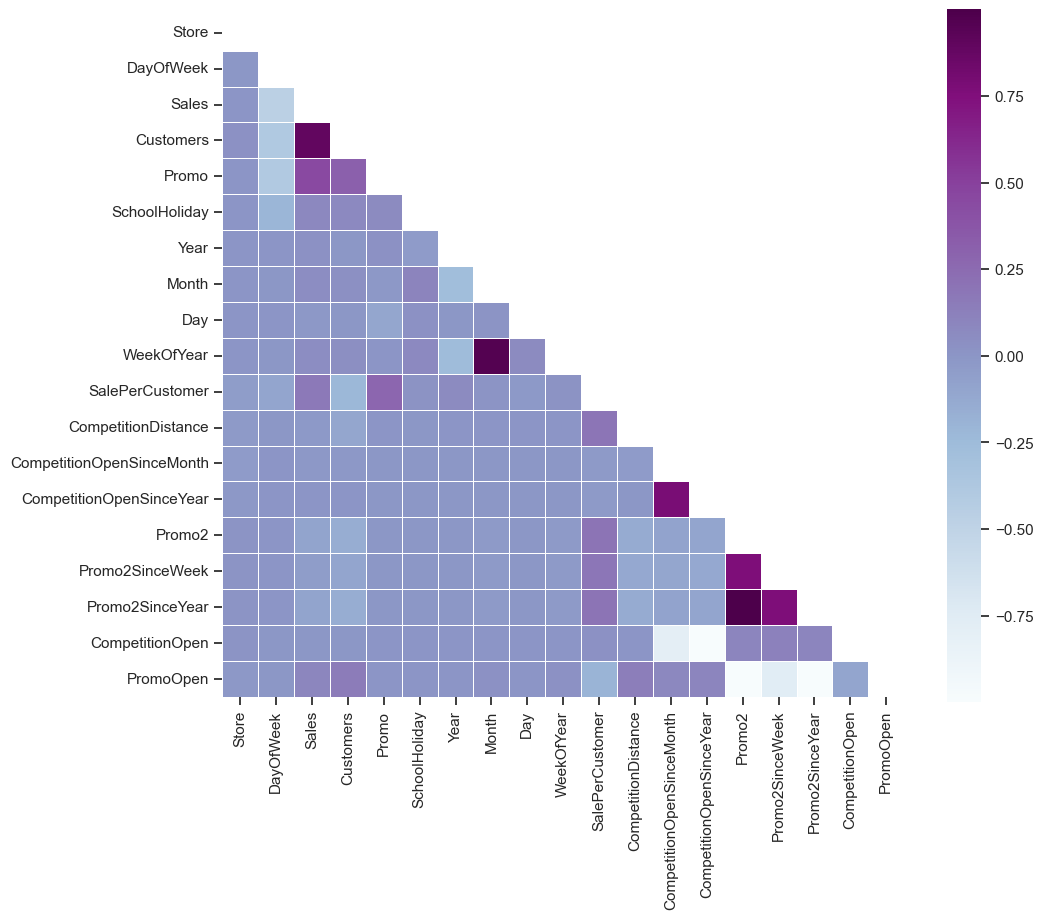

In [36]:
# Compute the correlation matrix 
# exclude 'Open' variable
corr_all = train_store.drop('Open', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

As mentioned before, we have a strong positive correlation between the amount of Sales and Customers of a store. We can also observe a positive correlation between the fact that the store had a running promotion (Promo equal to 1) and amount of Customers.

However, as soon as the store continues a consecutive promotion (Promo2 equal to 1) the number of Customers and Sales seems to stay the same or even decrease, which is described by the pale negative correlation on the heatmap. The same negative correlation is observed between the presence of the promotion in the store and the day of a week.

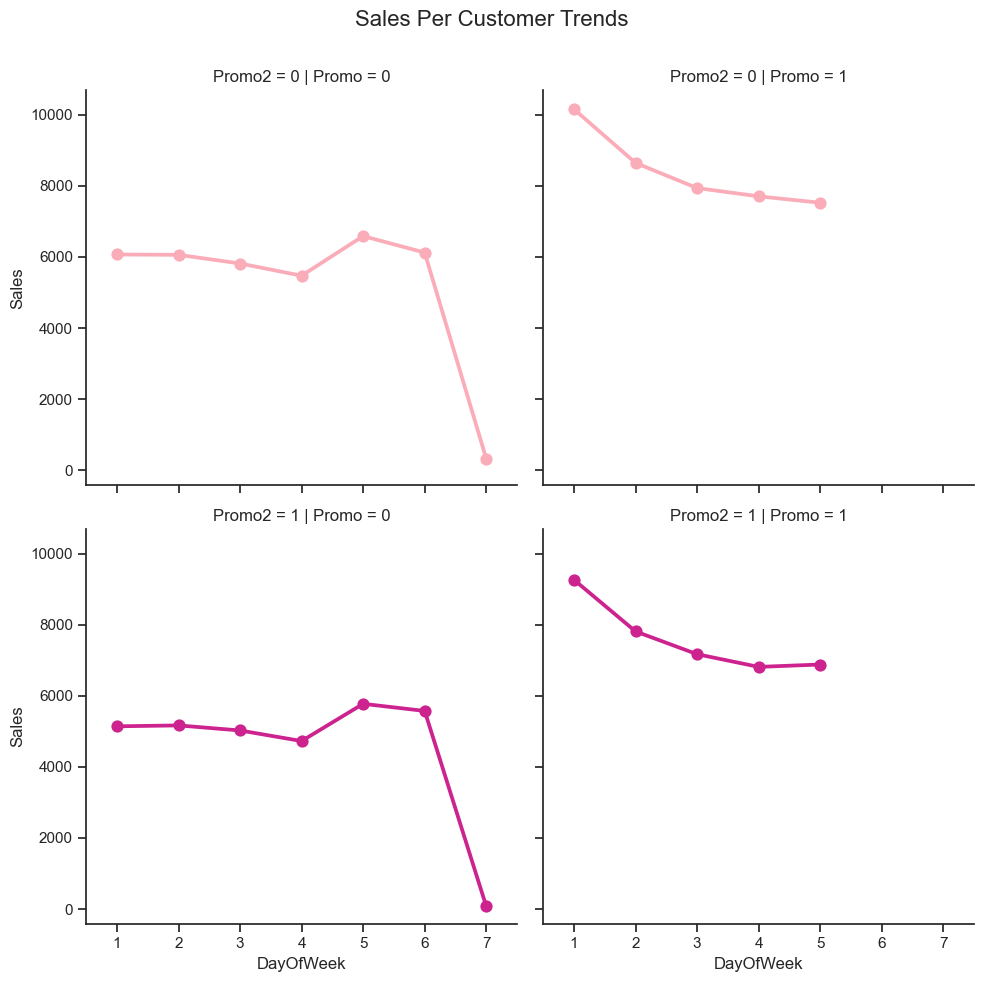

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the catplot to visualize "Sales" per customer trends
sns.catplot(data=train_store, x='DayOfWeek', y='Sales',
            col='Promo', row='Promo2',
            hue='Promo2', palette='RdPu',
            kind='point')

# Customize the plot (optional)
plt.subplots_adjust(top=0.9) 
plt.suptitle('Sales Per Customer Trends', fontsize=16)
plt.show()

There are several things here:
* In case of no promotion, both Promo and Promo2 are equal to 0, Sales tend to peak on Sunday (!). Though we should note that StoreType C doesn't work on Sundays. So it is mainly data from StoreType A, B and D.
* On the contrary, stores that run the promotion tend to make most of the Sales on Monday. This fact could be a good indicator for Rossmann marketing campaigns. The same trend follow the stores which have both promotion at the same time (Promo and Promo2 are equal to 1).
* Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount. This can be also prooved by the blue pale area on the heatmap above.

### Task-1  Exploration of customer purchasing behavior

* Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

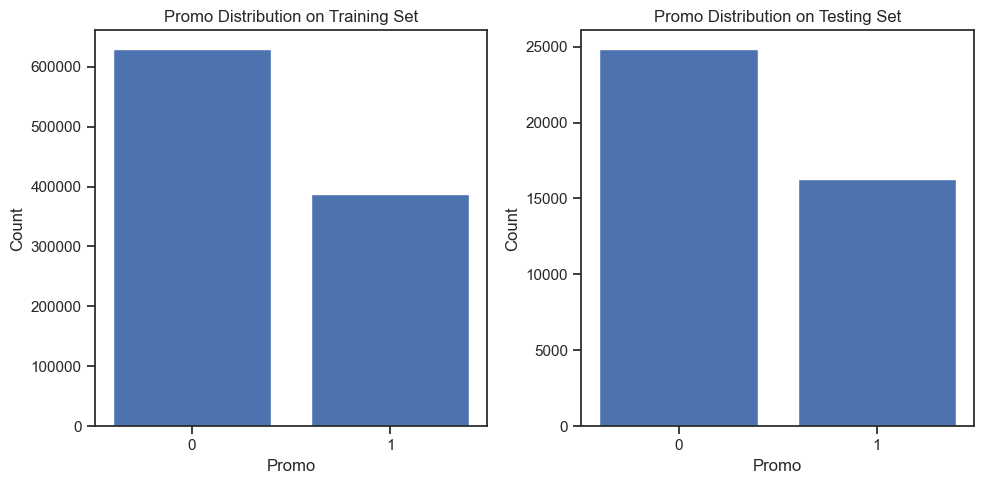

In [38]:
train_distribution = train_df['Promo'].value_counts()
test_distribution = test_df['Promo'].value_counts()

plt.figure(figsize=(10, 5))

# plot for training set
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1 (left side)
plt.bar(train_distribution.index, train_distribution)
plt.xticks(train_distribution.index)  # To show only 0 and 1 on the x-axis
plt.xlabel('Promo')
plt.ylabel('Count')
plt.title('Promo Distribution on Training Set')

# plot for testing set
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2 (right side)
plt.bar(test_distribution.index, test_distribution)
plt.xticks(test_distribution.index)  # To show only 0 and 1 on the x-axis
plt.xlabel('Promo')
plt.ylabel('Count')
plt.title('Promo Distribution on Testing Set')

plt.tight_layout()
plt.show()

Observation: The distributiuon of promo over ontraining stet is greaterthan the promo distribution over test set

* Check & compare sales behavior before, during and after holidays

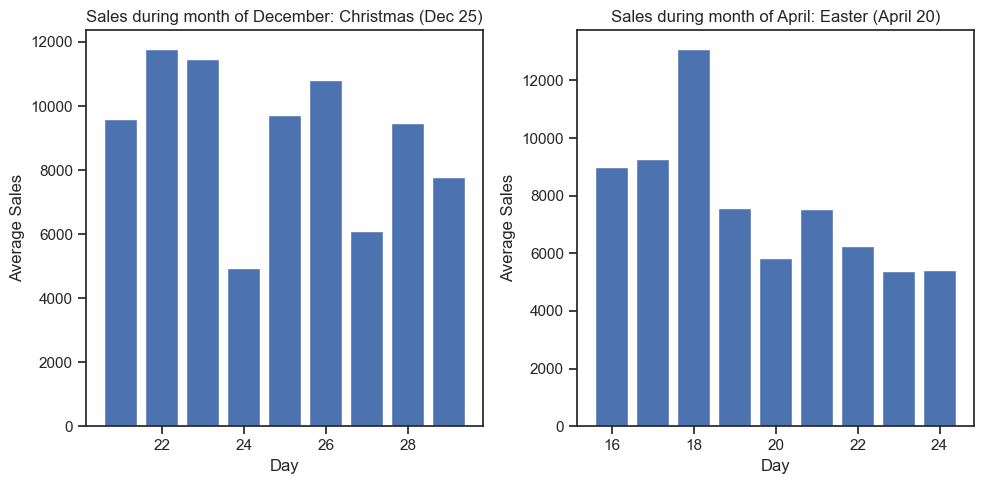

In [40]:
open_store = train_store[(train_store.Open == 1) & (train_store.Year == 2014)]

christmas_month = 12
easter_month = 4

christmas_month_data = open_store[open_store.Month == christmas_month]
easter_month_data = open_store[open_store.Month == easter_month]

around_christmas = christmas_month_data[(christmas_month_data['Day'] > 20) & (christmas_month_data['Day'] < 30)]
around_christmas_avg_sales = around_christmas[['Day', 'Sales']].groupby('Day').mean()

around_easter = easter_month_data[(easter_month_data['Day'] > 15) & (easter_month_data['Day'] < 25)]
around_easter_avg_sales = around_easter[['Day', 'Sales']].groupby('Day').mean()

plt.figure(figsize=(10, 5))

# Bar plot for Christmas sales
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1 (left side)
plt.bar(around_christmas_avg_sales.index, around_christmas_avg_sales['Sales'])
plt.xlabel('Day')
plt.ylabel('Average Sales')
plt.title('Sales during month of December: Christmas (Dec 25)')

# Bar plot for Easter sales
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2 (right side)
plt.bar(around_easter_avg_sales.index, around_easter_avg_sales['Sales'])
plt.xlabel('Day')
plt.ylabel('Average Sales')
plt.title('Sales during month of April: Easter (April 20)')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Observation: there are more sales before and after the Holidays when it compared to holidays sales

* What can you say about the correlation between sales and number of customers?

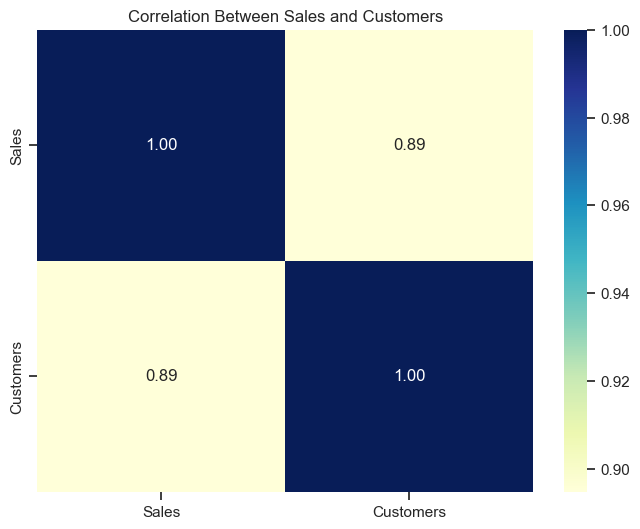

In [41]:
sales_customers_data = train_store[['Sales', 'Customers']]

correlation_matrix = sales_customers_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')  # Use 'YlGnBu' color map
plt.title('Correlation Between Sales and Customers')
plt.show()

Observation: the more customers the more sales. because there is a high correlation between Sales and Customers.

* How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

<Figure size 1200x700 with 0 Axes>

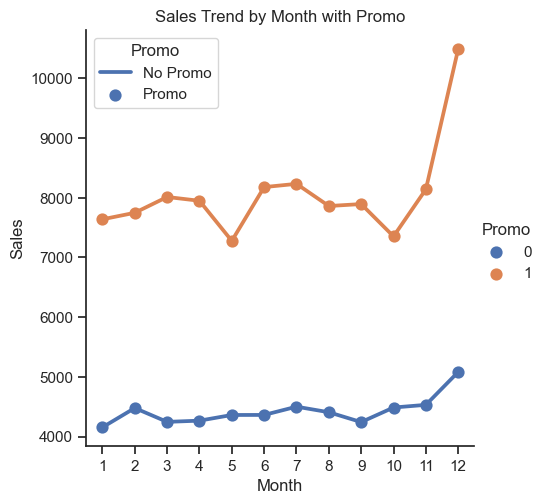

In [42]:
plt.figure(figsize=(12, 7))
sns.catplot(data=train_store, x="Month", y="Sales", hue="Promo", kind="point", ci=None, sharex=False)

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Trend by Month with Promo')
plt.legend(title='Promo', labels=['No Promo', 'Promo'])
plt.show()

<Figure size 1200x700 with 0 Axes>

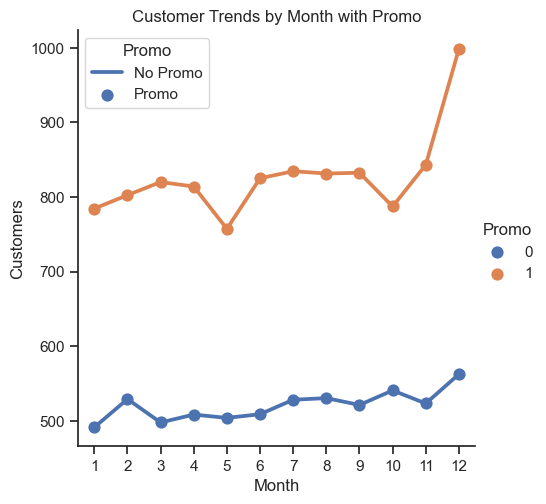

In [43]:
plt.figure(figsize=(12, 7))
sns.catplot(data=train_store, x="Month", y="Customers", hue="Promo", kind="point", ci=None, sharex=False)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Customers')
plt.title('Customer Trends by Month with Promo')
plt.legend(title='Promo', labels=['No Promo', 'Promo'])
plt.show()

Observation: Working on promotion increase the customers base and Increase Sales.

* Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

Number of Stores with mean sales >= 11176.341666666667 and sum of customers >= 420488.60000000003 are 74


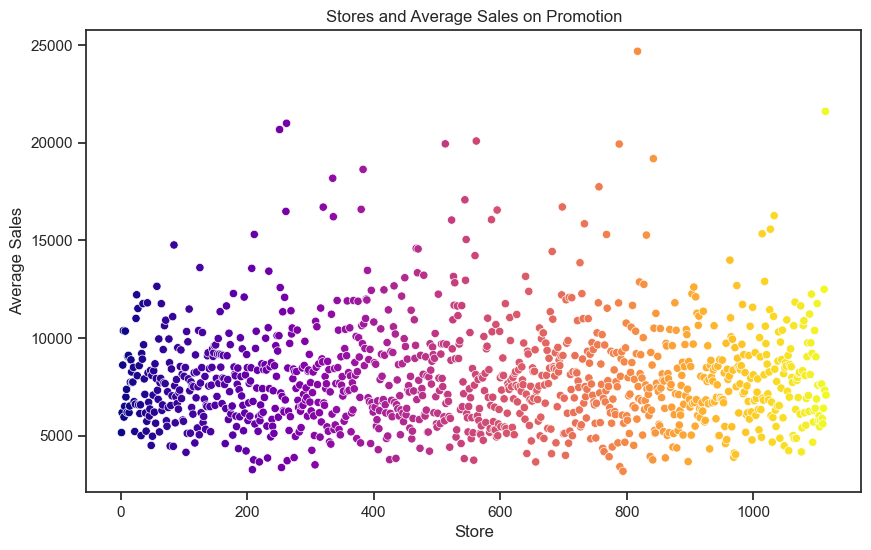

In [44]:
# Calculate mean sales and sum of customers for stores with Promo
store_with_promo = train_store[train_store.Promo == 1]
result = store_with_promo[['Store', 'Sales', 'Customers']].groupby('Store').agg({"Sales": "mean", 'Customers': 'sum'})

# Determine the threshold for stores with high sales and more customers
high_sales = result['Sales'].quantile(0.9)  # top 10 percent sales
many_customers = result['Customers'].quantile(0.9)  # top 10 percent customers

# Filter stores with higher sales and more customers
high_sales_customers = result[(result['Sales'] >= high_sales) & (result['Customers'] >= many_customers)]

print(f"Number of Stores with mean sales >= {high_sales} and sum of customers >= {many_customers} are {high_sales_customers.shape[0]}")

# Scatter plot of stores and their average sales on Promotion
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result, x="Store", y="Sales", hue="Store", palette='plasma')
plt.title('Stores and Average Sales on Promotion')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.legend([], [], frameon=False)  # Hide legend to prevent clutter
plt.show()

Observation: Developing critical promotion is needed for 74 stores to escalate the sales.

* Trends of customer behavior during store open and closing times

<Figure size 1200x700 with 0 Axes>

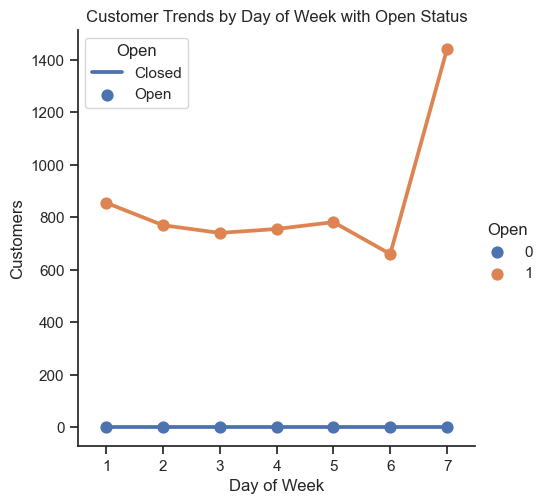

In [45]:
plt.figure(figsize=(12, 7))
sns.catplot(data=train_store, x="DayOfWeek", y="Customers", hue="Open", kind="point", ci=None, sharex=False)

plt.xlabel('Day of Week')
plt.ylabel('Customers')
plt.title('Customer Trends by Day of Week with Open Status')
plt.legend(title='Open', labels=['Closed', 'Open'])
plt.show()

Observation:Number of customers increase when the store is closed.

* Which stores are opened on all weekdays? How does that affect their sales on weekends? 

<Figure size 1200x700 with 0 Axes>

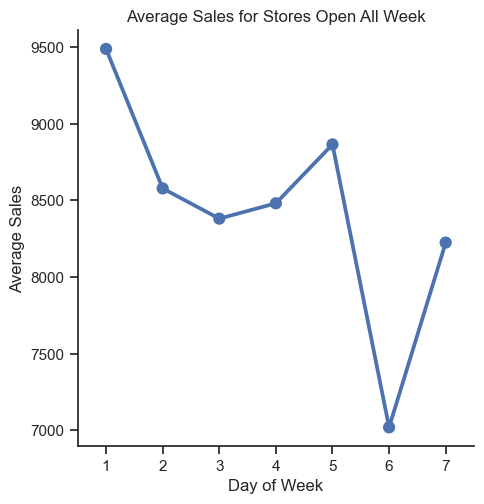

Stores That Work All Week: 33


In [46]:
# Identify stores that are open all week (unique DayOfWeek count = 7)
open_stores = train_store[train_store.Open == 1]
each_day = open_stores[['Store', 'DayOfWeek']].groupby('Store').nunique()
all_week_stores = each_day[each_day.DayOfWeek == 7]
stores_id = all_week_stores.reset_index()['Store']

# Filter stores that work all week
get_stores = open_stores[open_stores.Store.isin(set(stores_id))]
get_stores = get_stores[['Store', 'Sales', 'Customers', 'DayOfWeek']]

# Calculate the average sales for each day of the week
week_sales = get_stores.groupby('DayOfWeek').mean().reset_index()

plt.figure(figsize=(12, 7))
sns.catplot(data=week_sales, x="DayOfWeek", y="Sales", kind="point", ci=None, sharex=False)

plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.title('Average Sales for Stores Open All Week')
plt.show()

print(f'Stores That Work All Week: {all_week_stores.shape[0]}')

Observation: About 33 stores are opened on all weekdays and the sales escalate on weekends.

* Check how the assortment type affects sales

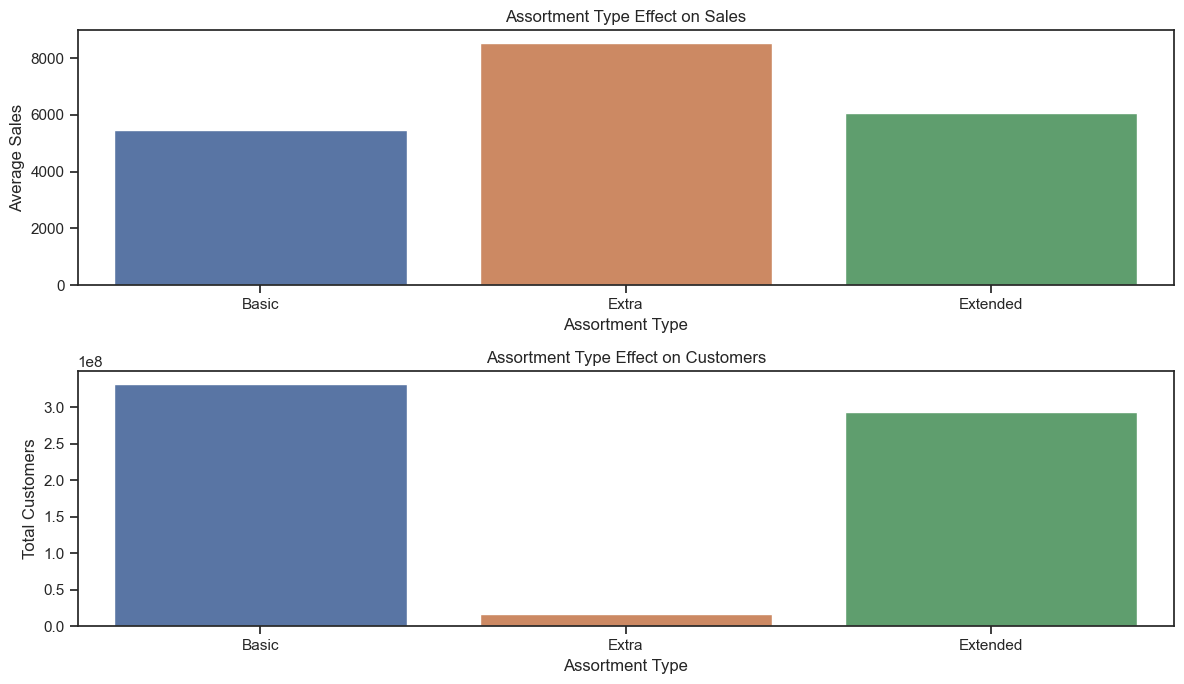

  Assortment        Sales  Customers Assortment_Desc
0          a  5481.026096  332766938           Basic
1          b  8553.931999   16972525           Extra
2          c  6058.676567  294302292        Extended


In [47]:
assortment = train_store.groupby('Assortment').agg({'Sales': 'mean', 'Customers': 'sum'}).reset_index()

# Map the assortment values to descriptive names
assortment_mapping = {'a': 'Basic', 'b': 'Extra', 'c': 'Extended'}
assortment['Assortment_Desc'] = assortment['Assortment'].map(assortment_mapping)

# Create separate bar plots for sales and customers using catplot
plt.figure(figsize=(12, 7))

# Bar plot for Sales
plt.subplot(2, 1, 1)  # 2 rows, 1 column, plot 1 (top)
sns.barplot(data=assortment, x='Assortment_Desc', y='Sales', ci=None)
plt.title('Assortment Type Effect on Sales')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')

# Bar plot for Customers
plt.subplot(2, 1, 2)  # 2 rows, 1 column, plot 2 (bottom)
sns.barplot(data=assortment, x='Assortment_Desc', y='Customers', ci=None)
plt.title('Assortment Type Effect on Customers')
plt.xlabel('Assortment Type')
plt.ylabel('Total Customers')

plt.tight_layout()
plt.show()
print(assortment)

Observation:The stores with extra assortment type have high mean sales and lowest customer numbers.

* How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

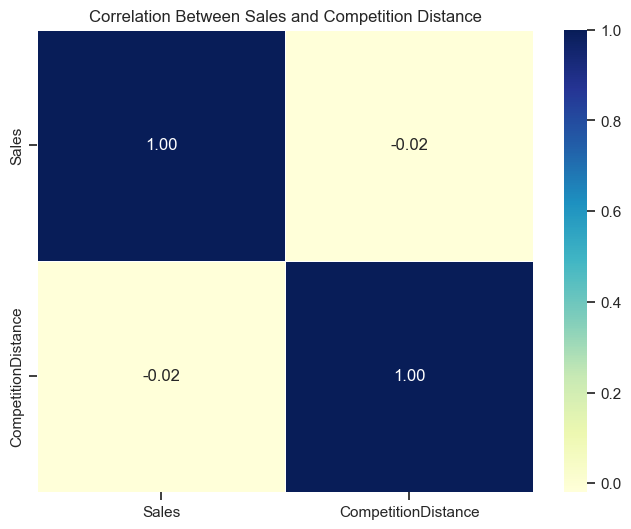

In [51]:
columns = train_store[['Sales', 'CompetitionDistance']]

# Calculate the correlation matrix
correlation_matrix = columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Sales and Competition Distance')
plt.show()

Observation: The more the closer the stores the higher the sales, and the more the distant the lower the sales.

* How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

In [53]:
train_store["CompetitionOpenSinceYear"].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
          0., 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

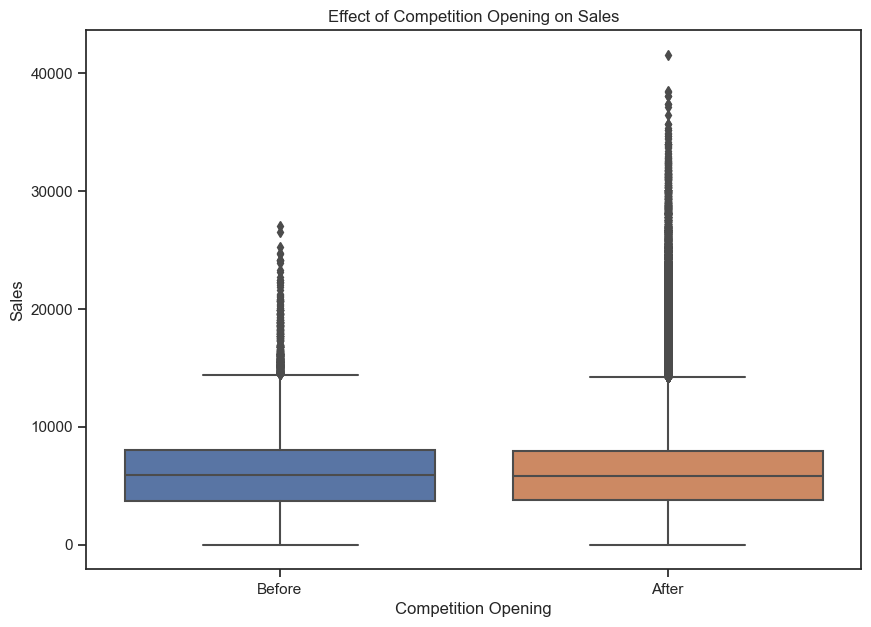

In [54]:
has_open_competition_df = train_store[train_store['CompetitionOpenSinceMonth'].notnull()]

has_open_competition_df["CompetitionOpenSinceYear"] = has_open_competition_df["CompetitionOpenSinceYear"].astype("int")
has_open_competition_df["CompetitionOpenSinceMonth"] = has_open_competition_df["CompetitionOpenSinceMonth"].astype("int")

sales_before_competition_open = has_open_competition_df[(has_open_competition_df["Year"] < has_open_competition_df["CompetitionOpenSinceYear"]) & (has_open_competition_df["Month"] < has_open_competition_df["CompetitionOpenSinceMonth"])]

sales_after_competition_open = has_open_competition_df[(has_open_competition_df["Year"] >= has_open_competition_df["CompetitionOpenSinceYear"]) & (has_open_competition_df["Month"] >= has_open_competition_df["CompetitionOpenSinceMonth"])]

sales_before_competition_open["CompetitionBefore"] = "Before"
sales_after_competition_open["CompetitionBefore"] = "After"

competition_sales_data = pd.concat([sales_before_competition_open, sales_after_competition_open])

plt.figure(figsize=(10, 7))
sns.boxplot(x='CompetitionBefore', y='Sales', data=competition_sales_data)
plt.xlabel('Competition Opening')
plt.ylabel('Sales')
plt.title('Effect of Competition Opening on Sales')
plt.show()

Observations: Number of sales increase when the competitors are opened.

## Conclusion of EDA

* The most selling and crowded StoreType is A.
* The best "Sale per Customer" StoreType D indicates to the higher Buyer Cart. To benefit from this fact, Rossmann can consider proposing bigger variety of its products.
* Low SalePerCustomer amount for StoreType B indicates to the possible fact that people shop there essentially for "small" things. Eventhough this StoreType generated the least amount of sales and customers over the whole period, it shows a great potential.
* Customers tends to buy more on Modays when there's one promotion (Promo) and on Sundays when there's no promotion at all (both Promo and Promo1 are equal to 0).
* Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount.